In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk


In [38]:
df = pd.read_csv("twitter_training.csv", delimiter=",")

In [40]:
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [50]:
df.rename(columns={'im getting on borderlands and i will murder you all ,': 'comments'}, inplace=True)

df['comments'] = df['comments'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

print(df.head())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                            comments  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you all  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands  and i will murder y...  
4  im getting into borderlands and i can murder y...  


In [52]:
print(df.columns)

Index(['2401', 'Borderlands', 'Positive', 'comments'], dtype='object')


In [54]:
df

,2401,Borderlands,Positive,comments
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you all
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands and i will murder y...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [56]:
df['comments']=df['comments'].str.replace("[^a-zA-Z#]"," ")
df.head()

,2401,Borderlands,Positive,comments
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you all
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands and i will murder y...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [58]:
df['comments']=df['comments'].astype(str)

In [60]:
df['comments']=df['comments'].fillna('')

In [62]:
tokenized_tweets=df['comments'].apply(lambda x: x.split())

In [64]:
tokenized_tweets.head()

0    [I, am, coming, to, the, borders, and, I, will...
1    [im, getting, on, borderlands, and, i, will, k...
2    [im, coming, on, borderlands, and, i, will, mu...
3    [im, getting, on, borderlands, and, i, will, m...
4    [im, getting, into, borderlands, and, i, can, ...
Name: comments, dtype: object

In [68]:
!pip install wordcloud

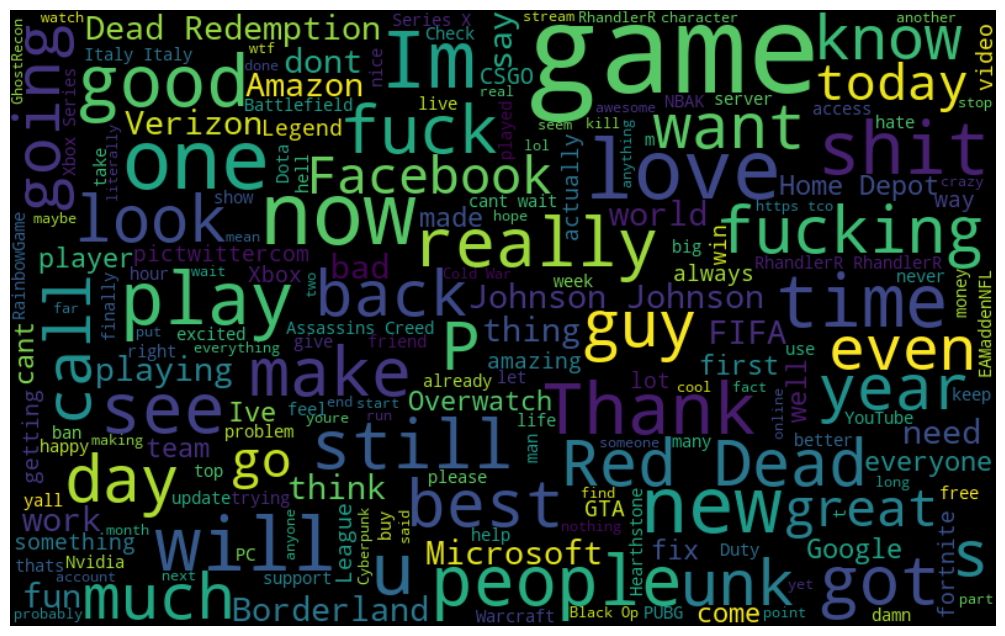

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


df["comments"] = df["comments"].astype(str)
df["comments"] = df["comments"].fillna("")


all_words = ' '.join([sentence for sentence in df['comments']])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)


plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   2401         74681 non-null  int64 
 1   Borderlands  74681 non-null  object
 2   Positive     74681 non-null  object
 3   comments     74681 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [82]:
df.rename(columns={'Positive': 'emotions'}, inplace=True)

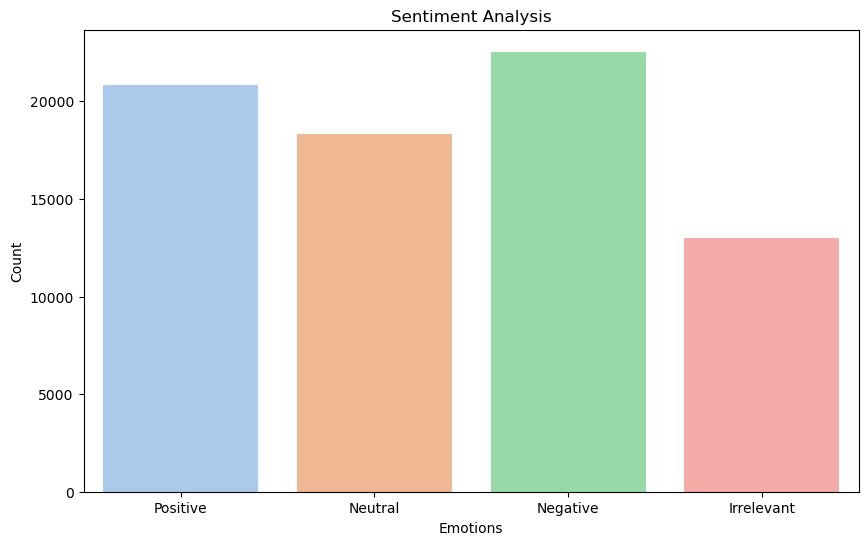

In [84]:
plt.figure(figsize=(10, 6))
sns.countplot(x='emotions', data=df, palette='pastel', legend=False, hue='emotions')
plt.title("Sentiment Analysis")
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.show()

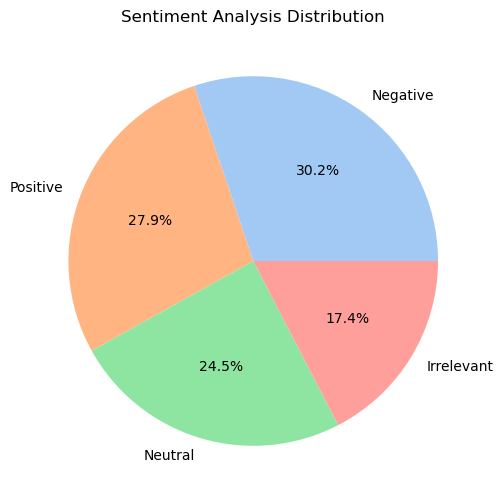

In [86]:
emotion_counts= df['emotions'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%',colors=sns.color_palette('pastel'))
plt.title('Sentiment Analysis Distribution')
plt.show()

In [88]:
df.describe()

,2401
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000
